<a href="https://colab.research.google.com/github/TermProject-BigData-2021-2/preprocess/blob/master/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_processing_hyunju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk.tag import pos_tag
from collections import Counter
import collections

review_data = load_files(r"drive/MyDrive/빅데이터")
X, y = review_data.data, review_data.target

documents = []
pluss=[]


stemmer = WordNetLemmatizer()
stemmer2 = nltk.stem.SnowballStemmer('english')
for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    # worst_num=document.count("worst")
    # boring_num=document.count("boring")

    #tags_en = nltk.pos_tag(document)
    #adj_list = [t[0] for t in tags_en if t[1] == "JJ" or t[1] == "JJR" or t[1]=="JJS" or t[1]=="RBR"]
    
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

vectorizer = CountVectorizer(min_df=10, max_df=0.8, stop_words=stopwords.words('english'))
#vectorizer = CountVectorizer(min_df=5,max_df=0.8, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[]


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm
import re
import nltk 
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


# 데이터 불러오기
data = pd.read_csv("drive/MyDrive/빅데이터/mbti_1.csv")
data.head()

#타입에 따른 개수
data['type'].value_counts()

# 데이터 정보
data.info()

px.pie(data,names='type',title='Personality type',hole=0.3)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


100%|██████████| 8675/8675 [00:09<00:00, 943.00it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.



'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



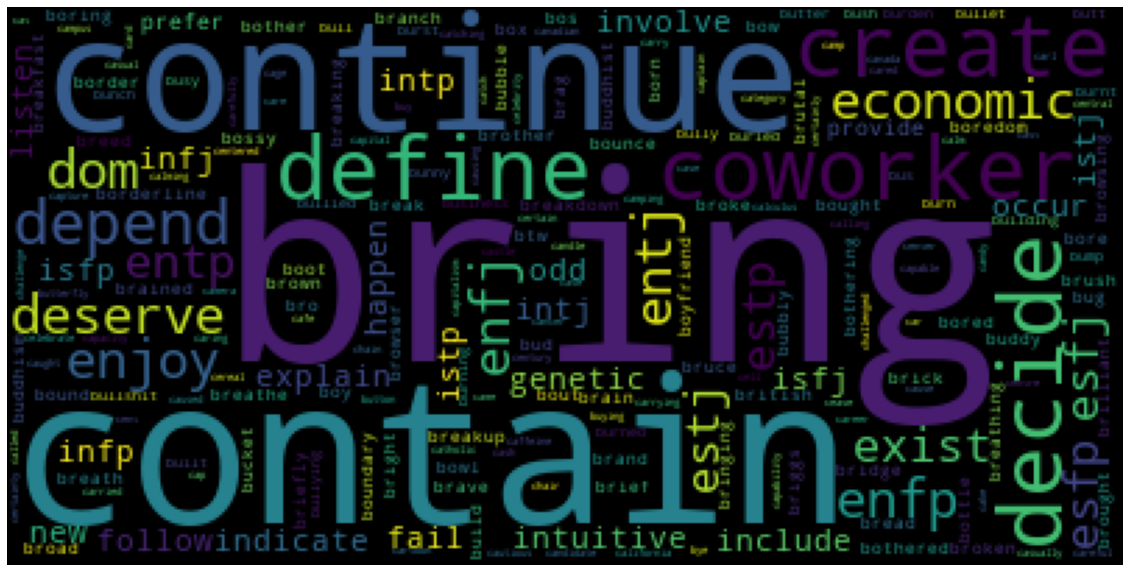

In [ ]:
exclamation_count_column = []
mbti_count_column = []
clean = []

# 데이터 정제 
for sentence in tqdm(data.posts):


    # 느낌표 개수 column
    exclamation_count = sentence.count("!")
    exclamation_count_column.append(exclamation_count)

    # mbti라는 단어의 개수
    sentence = sentence.lower()
    mbti_count = sum(x in {'mbti',"estj","estp","esfj","esfp","entp","entj","enfp","enfj","istj","istp","isfj","isfp","intp","intj","infp","infj"} for x in nltk.wordpunct_tokenize(sentence))
    #mbti_count = sum(map(sentence.count, ['mbti',"estj","estp","esfj","esfp","entp","entj","enfp","enfj","istj","istp","isfj","isfp","intp","intj","infp","infj"]))
    mbti_count_column.append(mbti_count)

    # 마지막에 http 없애기
    sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    sentence=re.sub('[^a-z]',' ',sentence)

    clean.append(sentence)
print(data.posts[0])
print(data.posts)
print(exclamation_count_column)
print(mbti_count_column)
#print(clean)

class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(clean)

feature_names=vectorizer.get_feature_names()
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)